## Movie Genre Data Analysis

Things to look at:

### Research Questions (Q):

1. Which genres are the most common (number of movies made)?
2. Which genres have high avg. budget and revenue?
3. Which genres have high avg Profit?
4. Which genres have high avg. popularity?
5. Which genres have highest number of movies with a voting avg >=8? 

### Research Hypotheses (H):

1. The best movies according to vote avg. return high profit and revenue.
2. The best movies according to popularity return high profit and revenue.
3. Highly budgeted movies return high profit.
4. Highly budgeted movies have a high popularity.
5. Profit per Genre per Year.

### Cleaning and formatting the data

In [1]:
import pandas as pd

In [2]:
movies = pd.read_csv(r'E:\Diego\Data_Analyst\Projects\Movie Genres Analysis (Python)\imdb_movies.csv')

In [4]:
pd.set_option('display.max.rows', 11000)
pd.set_option('display.max.columns', 22)

In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [9]:
movies[movies.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [11]:
movies.drop_duplicates(inplace=True)

In [12]:
movies.dropna(subset= ['genres'], inplace=True)

In [13]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10842 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10842 non-null  int64  
 1   imdb_id               10834 non-null  object 
 2   popularity            10842 non-null  float64
 3   budget                10842 non-null  int64  
 4   revenue               10842 non-null  int64  
 5   original_title        10842 non-null  object 
 6   cast                  10767 non-null  object 
 7   homepage              2931 non-null   object 
 8   director              10800 non-null  object 
 9   tagline               8036 non-null   object 
 10  keywords              9367 non-null   object 
 11  overview              10839 non-null  object 
 12  runtime               10842 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9826 non-null   object 
 15  release_date          10

In [14]:
movies['profit'] = movies['revenue'] - movies['budget']

In [15]:
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360


In [115]:
movies_genre = movies[['popularity', 'budget', 'revenue', 'original_title', 'runtime', 'genres', 'release_year', 'vote_count', 'vote_average', 'profit']]

In [19]:
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,1316249360


In [23]:
from pandas import Series, DataFrame

In [116]:
split = movies_genre['genres'].str.split('|').apply(Series,1).stack()
split.index = split.index.droplevel(-1)
split.name = 'genres_split'
del movies_genre['genres']
movies_genre = movies_genre.join(split)

C:\Users\DIEGO\AppData\Local\Temp\ipykernel_16088\1831005858.py:1: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  split = movies_genre['genres'].str.split('|').apply(Series,1).stack()


In [30]:
movies_genre

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,5/13/15,6185,7.1,228436354,Action
...,...,...,...,...,...,...,...,...,...,...
10863,0.065141,0,0,Beregis Avtomobilya,94,1/1/66,11,6.5,0,Mystery
10863,0.065141,0,0,Beregis Avtomobilya,94,1/1/66,11,6.5,0,Comedy
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,11/2/66,22,5.4,0,Action
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,11/2/66,22,5.4,0,Comedy


### Research Questions:
### 1. Which genres are the most common (number of movies made)?

In [43]:
genres_count = pd.DataFrame(movies_genre.groupby('genres_split').original_title.nunique()).sort_values(by='original_title', ascending = False)
genres_count

,original_title
genres_split,
Drama,4672
Comedy,3750
Thriller,2841
Action,2339
Romance,1686
Horror,1580
Adventure,1442
Crime,1337
Family,1211


<Axes: title={'center': 'Movies Per Genre in %'}, ylabel='original_title'>

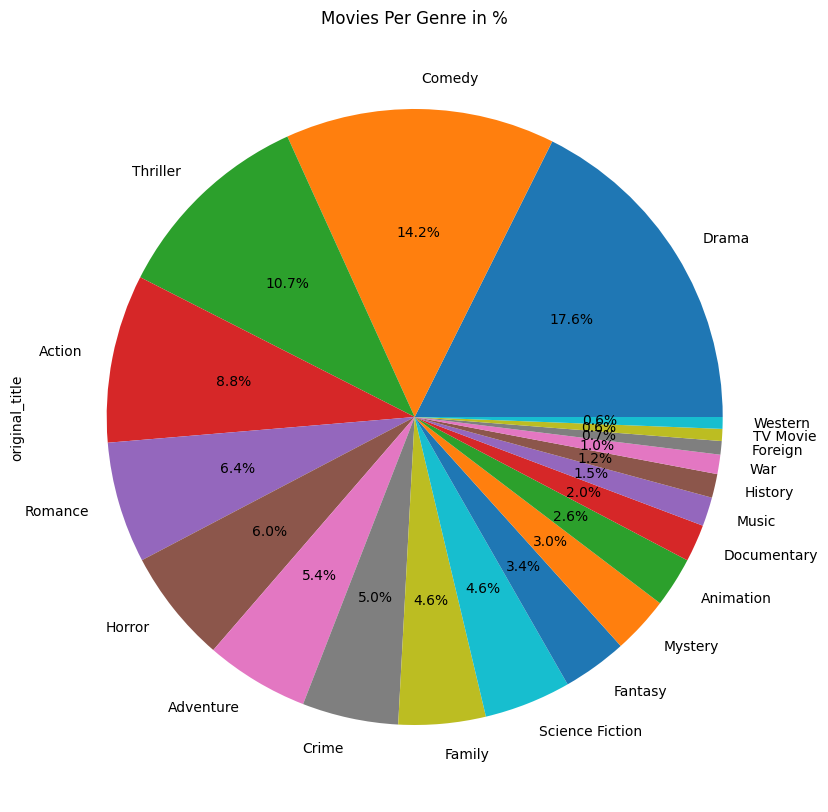

In [39]:
genres_count['original_title'].plot.pie(title = 'Movies Per Genre in %', autopct= '%1.1f%%', figsize= (10,10))

<Axes: title={'center': 'Movies Per Genre'}, ylabel='genres_split'>

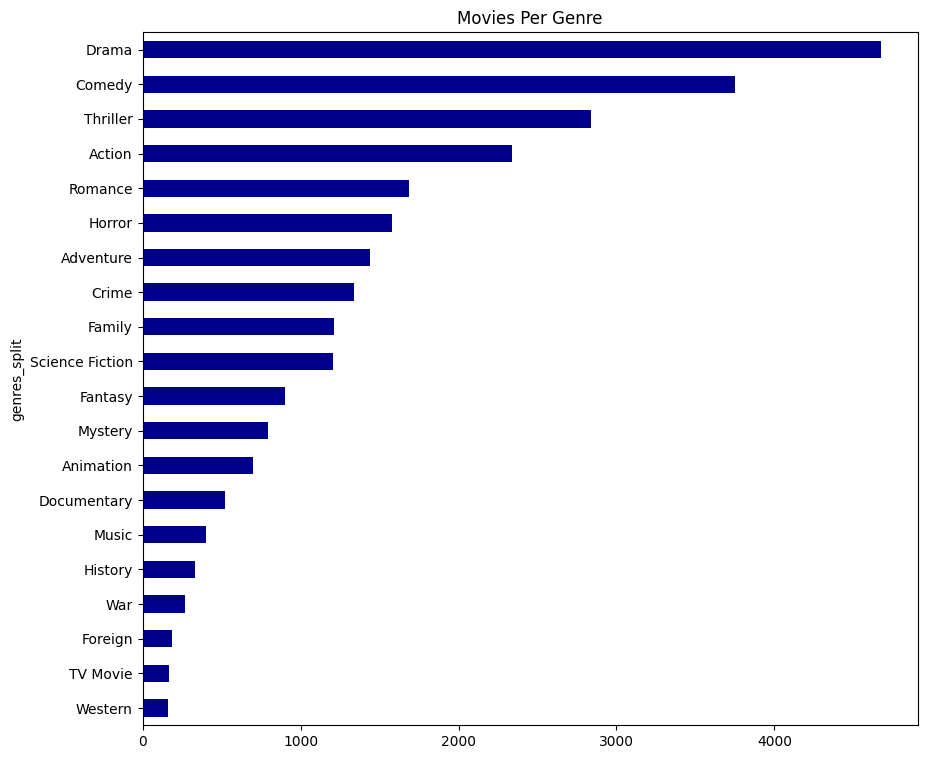

In [42]:
genres_count['original_title'].plot.barh(title='Movies Per Genre', color='DarkBlue', figsize=(10,9))

### 2. Which genres have high avg budget and revenue?

In [57]:
genres_avg = movies_genre.groupby('genres_split').mean(numeric_only=True)
pd.options.display.float_format = '{:2f}'.format
genres_avg

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
genres_split,,,,,,,
Action,0.926274,27727820.331376,72794732.002517,104.917785,392.993708,5.787752,45066911.671141
Adventure,1.154259,37543694.530931,113137861.069341,106.173351,513.125085,5.940585,75594166.538409
Animation,0.852182,23159781.606581,75256062.223176,68.181688,303.000000,6.403147,52096280.616595
Comedy,0.592607,13297915.618244,37526242.072238,96.745057,176.436330,5.905167,24228326.453994
Crime,0.744930,17663801.124815,42368661.645495,106.917282,278.805022,6.124889,24704860.520679
Documentary,0.181432,577149.148077,2041106.994231,102.651923,35.105769,6.908462,1463957.846154
Drama,0.591495,11880717.773529,29232255.725840,110.478151,182.544538,6.165546,17351537.952311
Family,0.786668,23359337.420796,72433176.373680,89.603574,272.320877,5.997563,49073838.952884
Fantasy,0.992840,32612585.348253,96313657.081878,100.736900,420.741266,5.863537,63701071.733624


In [66]:
genres_avg.sort_values('revenue', ascending= True, inplace=True)

In [59]:
genres_avg

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
genres_split,,,,,,,
Adventure,1.154259,37543694.530931,113137861.069341,106.173351,513.125085,5.940585,75594166.538409
Fantasy,0.992840,32612585.348253,96313657.081878,100.736900,420.741266,5.863537,63701071.733624
Action,0.926274,27727820.331376,72794732.002517,104.917785,392.993708,5.787752,45066911.671141
Science Fiction,1.001548,24972680.524003,70140558.034174,99.419854,437.096013,5.665582,45167877.510171
Family,0.786668,23359337.420796,72433176.373680,89.603574,272.320877,5.997563,49073838.952884
Animation,0.852182,23159781.606581,75256062.223176,68.181688,303.000000,6.403147,52096280.616595
War,0.727683,20891886.103704,47605183.300000,127.625926,270.733333,6.297778,26713297.196296
Western,0.590615,18974107.975758,28568709.284848,117.575758,205.739394,6.083030,9594601.309091
History,0.575936,18594919.302395,32011793.215569,136.206587,183.772455,6.410479,13416873.913174


<Axes: title={'center': 'Average Budget and Revenue by Genre'}, ylabel='genres_split'>

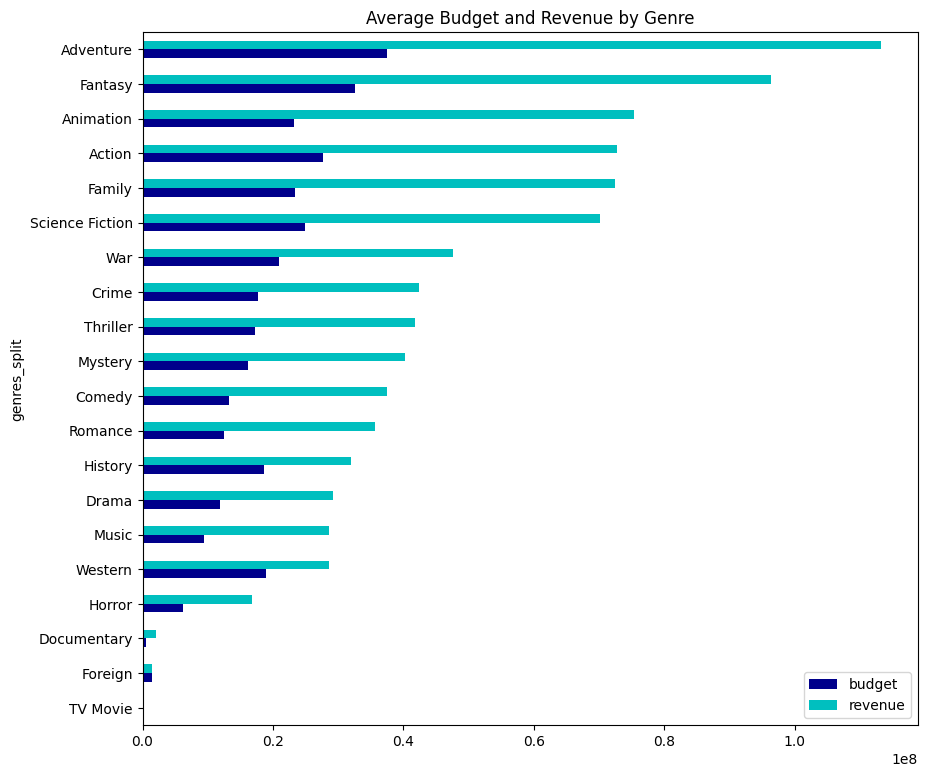

In [67]:
genres_avg[['budget', 'revenue']].plot.barh(title='Average Budget and Revenue by Genre', color= ('DarkBlue', 'c'), figsize=(10,9))

### 3. Which genres have high avg Profit?

In [75]:
genres_avg.sort_values(by='profit', ascending = True, inplace = True)

In [72]:
genres_avg

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
genres_split,,,,,,,
Adventure,1.154259,37543694.530931,113137861.069341,106.173351,513.125085,5.940585,75594166.538409
Fantasy,0.992840,32612585.348253,96313657.081878,100.736900,420.741266,5.863537,63701071.733624
Animation,0.852182,23159781.606581,75256062.223176,68.181688,303.000000,6.403147,52096280.616595
Family,0.786668,23359337.420796,72433176.373680,89.603574,272.320877,5.997563,49073838.952884
Science Fiction,1.001548,24972680.524003,70140558.034174,99.419854,437.096013,5.665582,45167877.510171
Action,0.926274,27727820.331376,72794732.002517,104.917785,392.993708,5.787752,45066911.671141
War,0.727683,20891886.103704,47605183.300000,127.625926,270.733333,6.297778,26713297.196296
Crime,0.744930,17663801.124815,42368661.645495,106.917282,278.805022,6.124889,24704860.520679
Thriller,0.741563,17207693.769178,41728417.543860,103.247678,255.484348,5.750671,24520723.774682


<Axes: title={'center': 'Average Profit by Genre'}, ylabel='genres_split'>

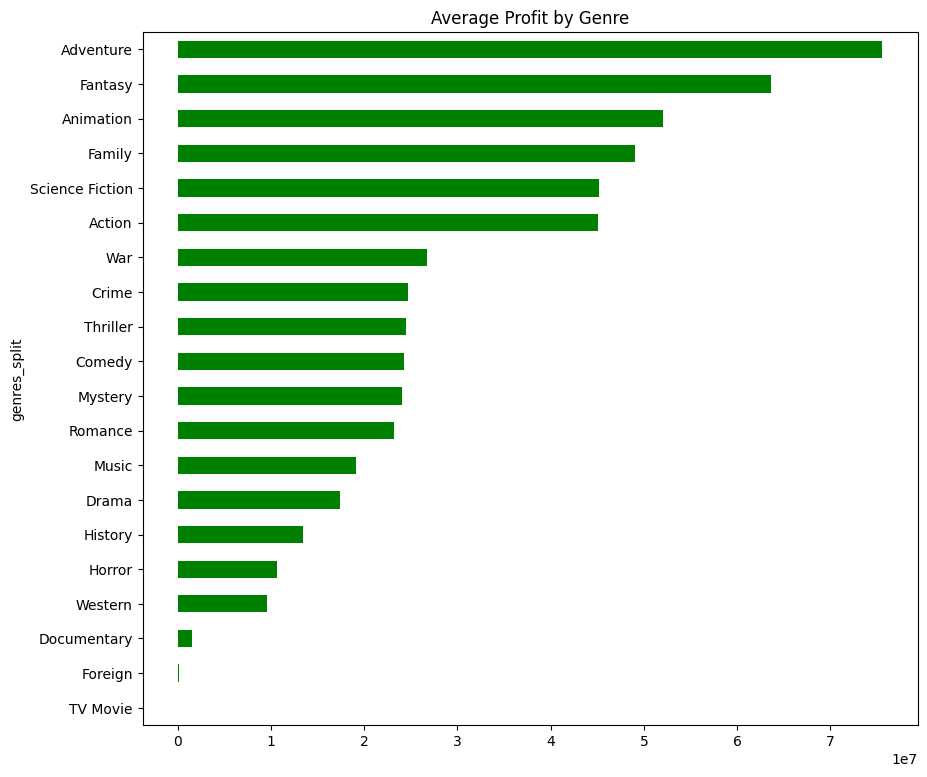

In [76]:
genres_avg['profit'].plot.barh(title='Average Profit by Genre', color = 'Green', figsize = (10,9))

### 4. Which genres have high avg. popularity?

In [81]:
genres_avg.sort_values(by='popularity', ascending = True, inplace = True)

In [80]:
genres_avg

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
genres_split,,,,,,,
Adventure,1.154259,37543694.530931,113137861.069341,106.173351,513.125085,5.940585,75594166.538409
Science Fiction,1.001548,24972680.524003,70140558.034174,99.419854,437.096013,5.665582,45167877.510171
Fantasy,0.992840,32612585.348253,96313657.081878,100.736900,420.741266,5.863537,63701071.733624
Action,0.926274,27727820.331376,72794732.002517,104.917785,392.993708,5.787752,45066911.671141
Animation,0.852182,23159781.606581,75256062.223176,68.181688,303.000000,6.403147,52096280.616595
Family,0.786668,23359337.420796,72433176.373680,89.603574,272.320877,5.997563,49073838.952884
Crime,0.744930,17663801.124815,42368661.645495,106.917282,278.805022,6.124889,24704860.520679
Thriller,0.741563,17207693.769178,41728417.543860,103.247678,255.484348,5.750671,24520723.774682
War,0.727683,20891886.103704,47605183.300000,127.625926,270.733333,6.297778,26713297.196296


<Axes: title={'center': 'Average Popularity by Genre'}, ylabel='genres_split'>

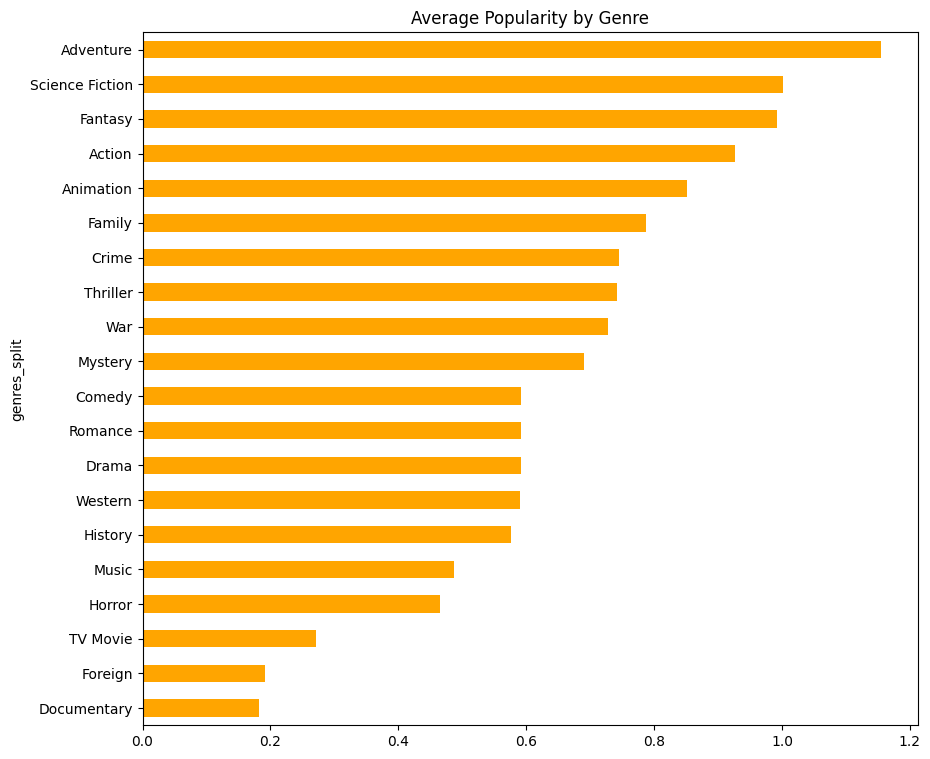

In [82]:
genres_avg['popularity'].plot.barh(title='Average Popularity by Genre', color = 'Orange', figsize = (10,9))

### 5. Which genres have highest number of movies with a voting avg >=8?

In [83]:
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.500000,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.500000,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.500000,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.500000,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,5/13/15,6185,7.100000,228436354,Action


In [85]:
vote_fifty = movies_genre[(movies_genre['vote_count'] >= 50) & (movies_genre['vote_average'] >= 8)]

In [86]:
vote_fifty

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,profit,genres_split
9,6.326804,175000000,853708609,Inside Out,94,6/9/15,3935,8.000000,678708609,Comedy
9,6.326804,175000000,853708609,Inside Out,94,6/9/15,3935,8.000000,678708609,Animation
9,6.326804,175000000,853708609,Inside Out,94,6/9/15,3935,8.000000,678708609,Family
35,3.557846,6000000,35401758,Room,117,10/16/15,1520,8.000000,29401758,Drama
35,3.557846,6000000,35401758,Room,117,10/16/15,1520,8.000000,29401758,Thriller
609,0.033378,0,0,The Jinx: The Life and Deaths of Robert Durst,240,2/8/15,72,8.400000,0,Documentary
629,24.949134,165000000,621752480,Interstellar,169,11/5/14,6498,8.000000,456752480,Adventure
629,24.949134,165000000,621752480,Interstellar,169,11/5/14,6498,8.000000,456752480,Drama
629,24.949134,165000000,621752480,Interstellar,169,11/5/14,6498,8.000000,456752480,Science Fiction
636,8.110711,14000000,233555708,The Imitation Game,113,11/14/14,3478,8.000000,219555708,History


In [91]:
genres_vote = pd.DataFrame(vote_fifty.groupby('genres_split').vote_average.nunique()).sort_values(by='vote_average', ascending = True)

In [89]:
genres_vote

,vote_average
genres_split,
Drama,5
Documentary,5
Crime,4
Action,2
Adventure,2
Comedy,2
Thriller,2
Music,2
History,2


<Axes: title={'center': 'Vote Average by Genre'}, ylabel='genres_split'>

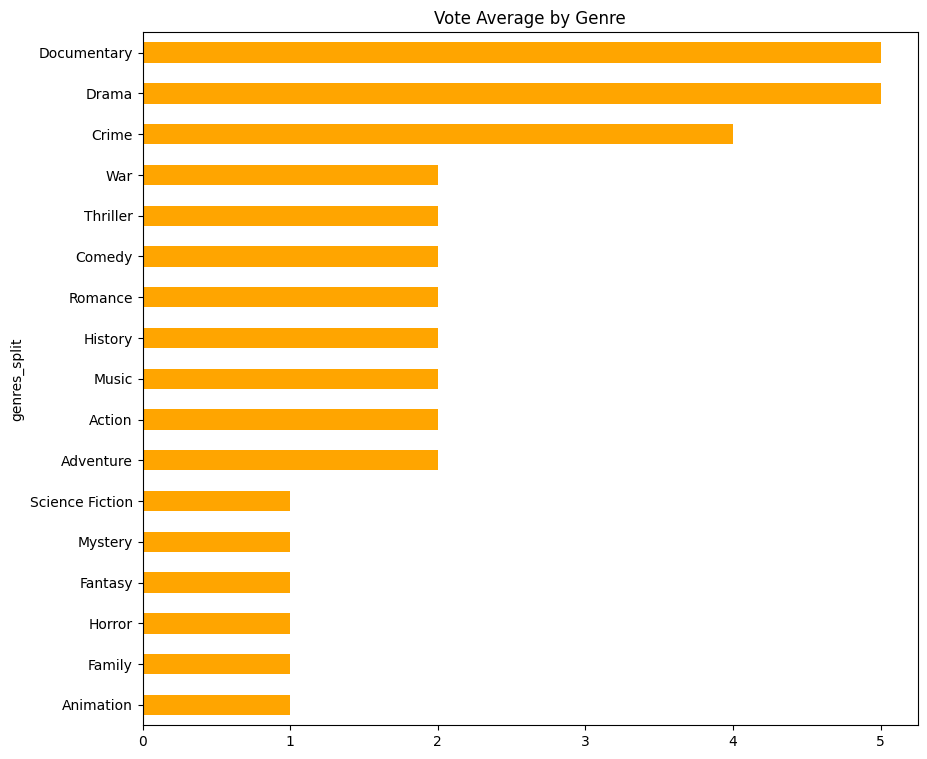

In [92]:
genres_vote['vote_average'].plot.barh(title='Vote Average by Genre', color = 'Orange', figsize = (10,9))

### Hypotheses:
### 1. The best movies according to vote avg. return high profit and revenue.

In [94]:
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.500000,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.100000,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.300000,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.500000,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.300000,1316249360


In [98]:
movies_voted = movies_genre[movies_genre['vote_count'] >= 50]

In [97]:
movies_voted.corr(method = 'spearman', numeric_only=True)

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
popularity,1.000000,0.484952,0.588594,0.230214,0.768888,0.189226,0.498092
budget,0.484952,1.000000,0.714733,0.360001,0.554412,-0.044050,0.334345
revenue,0.588594,0.714733,1.000000,0.341469,0.682550,0.112201,0.842278
runtime,0.230214,0.360001,0.341469,1.000000,0.263164,0.286082,0.211947
vote_count,0.768888,0.554412,0.682550,0.263164,1.000000,0.285084,0.583606
vote_average,0.189226,-0.044050,0.112201,0.286082,0.285084,1.000000,0.198580
profit,0.498092,0.334345,0.842278,0.211947,0.583606,0.198580,1.000000


In [100]:
import seaborn as sns

<Axes: xlabel='vote_average', ylabel='profit'>

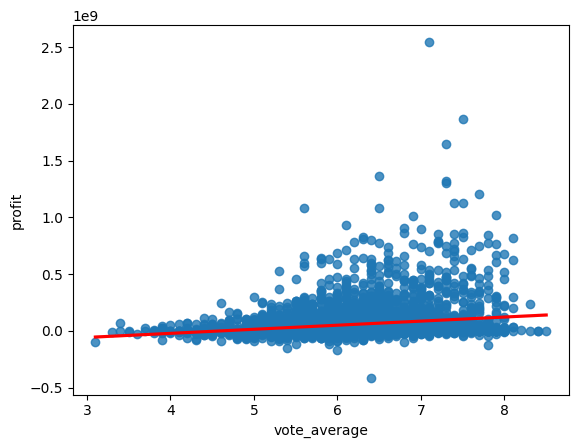

In [102]:
sns.regplot(data = movies_voted, x='vote_average', y='profit', line_kws = {'color': 'red'})

<Axes: xlabel='vote_average', ylabel='revenue'>

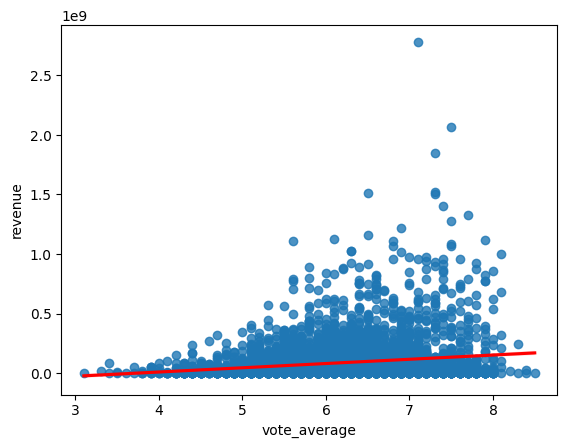

In [103]:
sns.regplot(data = movies_voted, x='vote_average', y='revenue', line_kws = {'color': 'red'})

### 2. The best movies according to popularity return high profit and revenue.

In [104]:
movies_voted.corr(method = 'spearman', numeric_only=True)

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
popularity,1.000000,0.484952,0.588594,0.230214,0.768888,0.189226,0.498092
budget,0.484952,1.000000,0.714733,0.360001,0.554412,-0.044050,0.334345
revenue,0.588594,0.714733,1.000000,0.341469,0.682550,0.112201,0.842278
runtime,0.230214,0.360001,0.341469,1.000000,0.263164,0.286082,0.211947
vote_count,0.768888,0.554412,0.682550,0.263164,1.000000,0.285084,0.583606
vote_average,0.189226,-0.044050,0.112201,0.286082,0.285084,1.000000,0.198580
profit,0.498092,0.334345,0.842278,0.211947,0.583606,0.198580,1.000000


In [106]:
import matplotlib.pyplot as plt

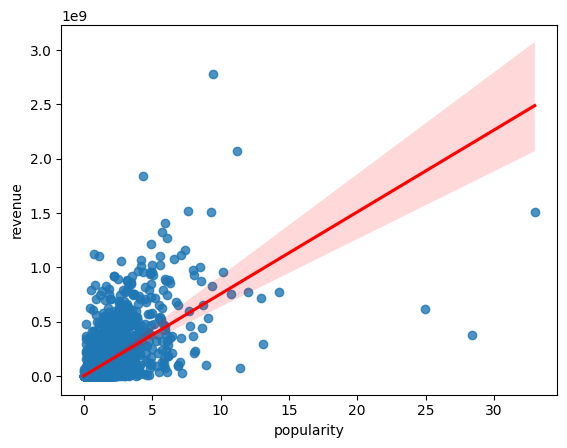

<Figure size 1000x500 with 0 Axes>

In [108]:
sns.regplot(data = movies_voted, x='popularity', y='revenue', line_kws = {'color': 'red'})
plt.figure(figsize = (10,5))
plt.show()

### 3. Highly budgeted movies return high profit.

In [110]:
movies_voted.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.500000,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.100000,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.300000,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.500000,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.300000,1316249360


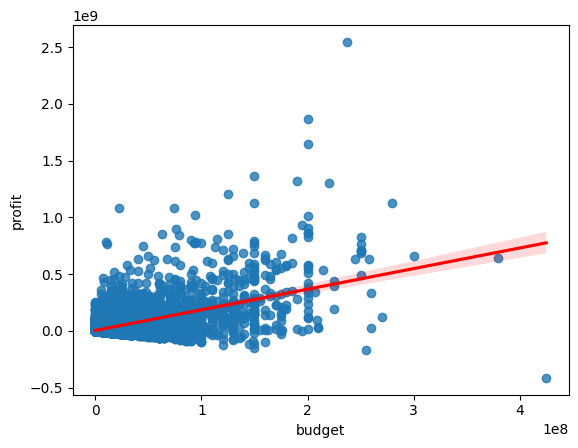

<Figure size 1000x500 with 0 Axes>

In [111]:
sns.regplot(data = movies_voted, x='budget', y='profit', line_kws = {'color': 'red'})
plt.figure(figsize = (10,5))
plt.show()

### 4. Highly budgeted movies have a high popularity.

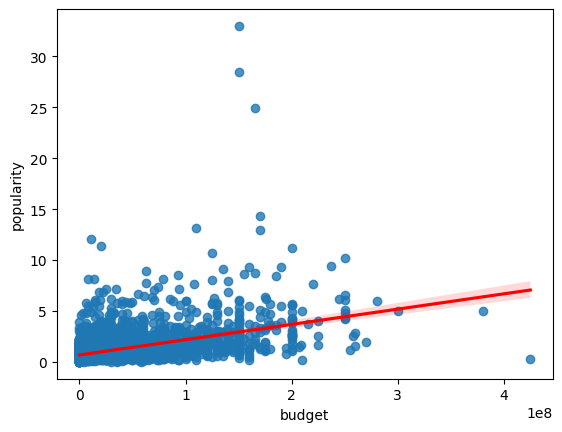

<Figure size 1000x500 with 0 Axes>

In [113]:
sns.regplot(data = movies_voted, x='budget', y='popularity', line_kws = {'color': 'red'})
plt.figure(figsize = (10,5))
plt.show()

### 5. Profit per Genre per Year

In [117]:
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,release_year,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,2015,6185,7.100000,228436354,Action


In [118]:
movies_genre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26955 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      26955 non-null  float64
 1   budget          26955 non-null  int64  
 2   revenue         26955 non-null  int64  
 3   original_title  26955 non-null  object 
 4   runtime         26955 non-null  int64  
 5   release_year    26955 non-null  int64  
 6   vote_count      26955 non-null  int64  
 7   vote_average    26955 non-null  float64
 8   profit          26955 non-null  int64  
 9   genres_split    26955 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 2.3+ MB


In [121]:
time_genre = pd.DataFrame(movies_genre.groupby(['release_year','genres_split'])['profit'].mean())

In [122]:
time_genre

profit
release_year genres_split                    
1960         Action            6363125.000000
             Adventure          431000.000000
             Comedy            5258750.000000
             Crime                   0.000000
             Drama             8245619.384615
             Family            3333333.333333
             Fantasy           -375000.000000
             Foreign                 0.000000
             History           9600000.000000
             Horror            4389007.428571
             Music                   0.000000
             Romance           5225000.000000
             Science Fiction   -316666.666667
             Thriller          5028842.000000
             War                     0.000000
             Western            484166.666667
1961         Action            2457142.857143
             Adventure        39130002.333333
             Animation       211880014.000000
             Comedy           22198001.400000
             Crime            18828411.000000
             Drama             4912698.375000
             Family           42576002.800000
             Fantasy                 0.000000
             Foreign                 0.000000
             History           2333333.333333
             Horror             600000.000000
             Music            18828411.000000
             Mystery                 0.000000
             Romance            214285.714286
             Science Fiction         0.000000
             War              11450000.000000
             Western           -566666.666667
1962         Action           10437500.000000
             Adventure        21214285.714286
             Comedy            1599974.800000
             Crime             3709948.666667
             Drama             4373796.190476
             Family            4000000.000000
             Fantasy              -126.000000
             Foreign              -126.000000
             History          11250000.000000
             Horror             231600.000000
             Music             8000000.000000
             Mystery           -245000.000000
             Romance           -400025.200000
             Science Fiction    -31000.000000
             Thriller          7902857.142857
             War              15000000.000000
             Western          13266666.666667
1963         Action           14999691.250000
             Adventure         9428395.000000
             Animation               0.000000
             Comedy             765591.923077
             Crime              369526.750000
             Drama             1587307.692308
             Family            -333333.333333
             Fantasy           -500000.000000
             Foreign                 0.000000
             History           4908750.000000
             Horror             898558.777778
             Mystery           1568014.666667
             Romance           4388698.500000
             Science Fiction   -375000.000000
             Thriller          8612335.300000
             War               1000000.000000
             Western                 0.000000
1964         Action           24280000.000000
             Adventure        24123400.000000
             Animation               0.000000
             Comedy            7080111.375000
             Crime             1723307.300000
             Drama             3726105.550000
             Family           37818181.750000
             Fantasy          24068181.750000
             Foreign                 0.000000
             History                 0.000000
             Horror             -10833.333333
             Music            30354655.200000
             Mystery           1216209.750000
             Romance           6722222.222222
             Science Fiction   -300000.000000
             Thriller         14029426.555556
             War               2546757.333333
             Western                 0.000000
1965         Action           1610450

In [125]:
yearly_genre = pd.pivot_table(time_genre, values= 'profit', index= 'genres_split', columns = 'release_year')

In [126]:
yearly_genre

release_year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
genres_split,,,,,,,,,,,,,,,,,,,,,,,
Action,6363125.000000,2457142.857143,10437500.000000,14999691.250000,24280000.000000,16104504.777778,324785.714286,21732786.428571,8868478.833333,5861449.300000,7735913.454545,...,32379154.185714,38048623.212500,45977444.052632,47642764.404040,57555510.740741,34571030.355140,51968078.252174,71910257.424242,47431725.628099,69943650.015504,90399046.747664
Adventure,431000.000000,39130002.333333,21214285.714286,9428395.000000,24123400.000000,25124276.333333,791563.636364,49281873.857143,15122159.400000,16651809.400000,11406377.666667,...,70756754.320755,64895200.090909,83916731.083333,55016526.809524,113364919.736111,98125646.677966,113343224.564516,162549574.300000,100638113.402985,120373306.985075,144787868.971014
Animation,NaN,211880014.000000,NaN,0.000000,0.000000,0.000000,-105000.000000,100921706.000000,0.000000,0.000000,25837628.500000,...,40307312.153846,39047734.974359,67147670.531250,51907242.575758,48862898.250000,58455658.640000,63420098.934783,69231546.875000,93718795.261905,64313463.250000,83691174.384615
Comedy,5258750.000000,22198001.400000,1599974.800000,765591.923077,7080111.375000,3264285.714286,-149550.000000,10135087.470588,-1277777.777778,-125000.000000,11901488.583333,...,22147617.440559,24944308.174194,30674848.549669,21483012.426036,24741982.808081,23154807.875740,27241358.720930,25631999.136364,25068455.091429,26648786.864865,33703819.067901
Crime,0.000000,18828411.000000,3709948.666667,369526.750000,1723307.300000,-22500.000000,-275560.000000,12899678.714286,6762174.600000,31482963.000000,-2125000.000000,...,15680793.688889,21551432.962264,16700048.400000,31258696.854839,11016642.307692,13490412.320000,25395271.625000,29522925.555556,23248589.507042,5903014.230769,61286524.372549
Documentary,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,...,316012.705882,6772940.000000,5229344.631579,321262.230769,-1603933.560000,187417.771429,2567196.816327,1102306.591837,321880.225806,13104.136986,531061.859649
Drama,8245619.384615,4912698.375000,4373796.190476,1587307.692308,3726105.550000,11933809.800000,1014793.062500,18045095.000000,6354859.150000,10317995.538462,19753262.842105,...,17180823.510989,12994800.142132,13953425.421320,16736384.017167,15209056.888393,13510589.176190,10830976.523364,23418944.870690,13344942.608696,13697098.665493,16315310.438462
Family,3333333.333333,42576002.800000,4000000.000000,-333333.333333,37818181.750000,51671428.666667,-341828.571429,64281204.000000,-640000.000000,0.000000,17225085.666667,...,51714774.929825,35281751.276923,80470561.733333,44483026.142857,62009322.100000,98999767.490909,65483435.472222,69321493.023810,89321956.437500,56295182.744186,85974520.750000
Fantasy,-375000.000000,0.000000,-126.000000,-500000.000000,24068181.750000,NaN,0.000000,-3000000.000000,-2000000.000000,0.000000,0.000000,...,64388182.000000,57967661.441176,93461583.425532,51441997.767442,96235822.102041,83235328.522727,94486677.847826,122245621.970588,79363628.000000,112966482.638889,86576948.303030


Text(0.5, 1.0, 'Genres by Profit by Year')

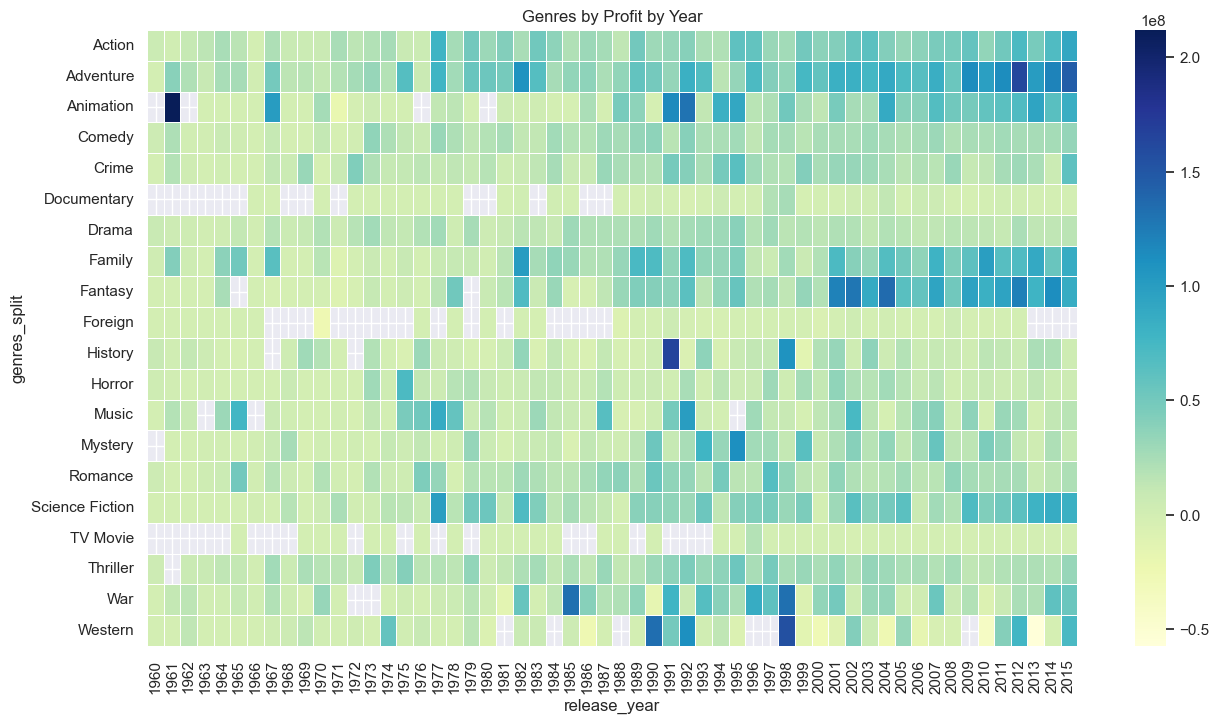

In [134]:
sns.set(rc = {'figure.figsize': (15,8)})
sns.heatmap(yearly_genre, cmap = 'YlGnBu', linewidths = 0.5)
plt.title('Genres by Profit by Year')